# Notes for the hackathon

To start working in this notebook on Google Colab:
- Go to [Google Colab](https://colab.research.google.com/)
- Make sure you're **logged in** with your (personal) google account
- Go to '**Open notebook**':
    
    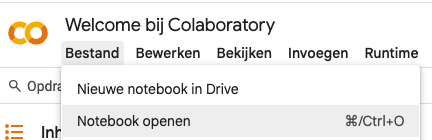
- Go to '**Github**' and copy-paste the github-url of the hackathon repo (https://github.com/tijlk/llm_agent_hackathon/):
    
    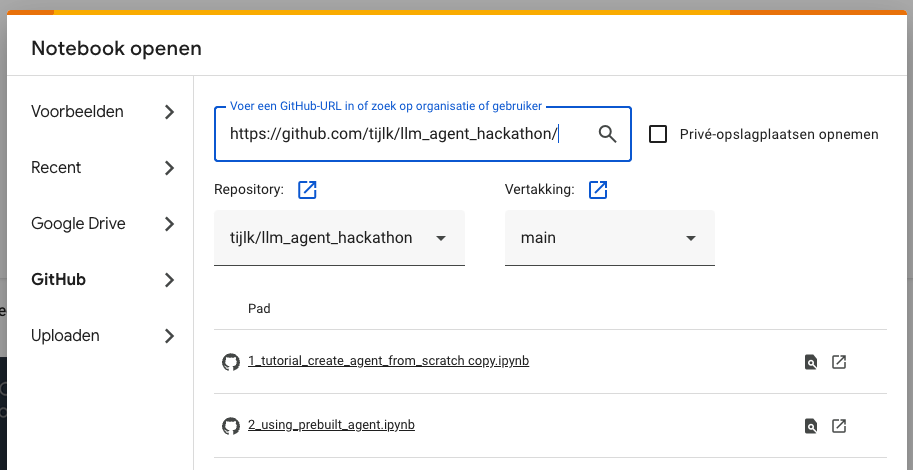
- **Click** one of the notebooks
- Go to '**Save a copy in Drive**' to save the notebook in your Google Drive. Otherwise any edits you make will be lost, as it can't save it to Github, since it's not your repository.
    
    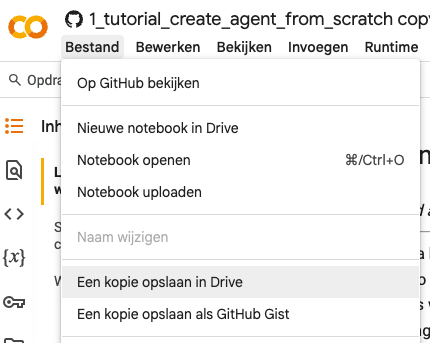

NOTE: If Google shows a network error when you try to make a copy in Drive, try creating a brand new notebook with **File -> New Notebook in Drive**. That will most likely fail as well with the same error. If that is the case:

- Delete your cookies for google.com
- Log out of your machine and log back in
- Don't go on the VPN
- Try again

# LangGraph Tutorial: Building Agents with LangChain's Agent Framework

*Sourced and adapted from [getzep.com](https://www.getzep.com/ai-agents/langgraph-tutorial)*

----

The idea behind the agent in LangChain is to use an LLM and a sequence of actions; the agent then uses a reasoning engine to decide which action to take. LangChain was useful for simple agents with straightforward chains and retrieval flows, but building more complex agentic systems was overly complicated—memory management, persistence, and human-in-the-loop components were implemented manually, rendering chains and agents less flexible.

This is where [LangGraph](https://www.langchain.com/langgraph) comes into play. LangGraph is an orchestration framework built by [LangChain](https://www.langchain.com/). LangGraph allows you to develop agentic LLM applications using a graph structure, which can be used with or without LangChain.

This article focuses on building agents with LangGraph rather than LangChain. It provides a tutorial for building LangGraph agents, beginning with a discussion of LangGraph and its components. These concepts are reinforced by building a LangGraph agent from scratch and managing conversation memory with LangGraph agents.

# Summary of key LangGraph tutorial concepts
The following are the main concepts covered in this article.

### What is LangGraph?

LangGraph is an AI agent framework that implements agent interactions as stateful graphs. Nodes represent functions or computational steps that are connected via edges. LangGraph maintains an agent state shared among all the nodes and edges.
Unlike LangChain, LangGraph supports the implementation of more complex agentic workflows. Key features include built-in persistence, support for human intervention, and the ability to handle complex workflows with cycles and branches.

### Building a LangGraph agent

Creating a LangGraph agent is the best way to understand the core concepts of nodes, edges, and state. The LangGraph Python libraries are modular and provide the functionality to build a stateful graph by incrementally adding nodes and edges.
Incorporating tools enables an agent to perform specific tasks and access external information. For example, the ArXiv tool wrapper can return content from research papers.
LangGraph offers a prebuilt reason and act (ReACT) agent that can help you get started.

### Memory management in LangGraph

A LangGraph agent is stateless by default, meaning that it does not remember previous conversations, which limits its ability to have meaningful exchanges. To address this, LangGraph supports both short-term and long-term memory. Memory support in LangGraph can be extended further with Zep Memory.

### Guidelines for building LangGraph agents

LangGraph overcomes LangChain's limitations and is the recommended framework for building agentic architectures. You can integrate tools into your AI agents to provide functionality or fetch information that an LLM agent does not provide. Memory is integral to building production-ready AI agents, and third-party SDKs like Zep simplify adding long-term capabilities.

# What is LangGraph?

LangGraph is an AI agent framework built on LangChain that allows developers to create more sophisticated and flexible agent workflows. Unlike traditional LangChain chains and agents, LangGraph implements agent interactions as cyclic graphs with multiple-step processing involving branching and loops. This eliminates the need to implement custom logic to control the flow of information between multiple agents in the workflow.

## How LangGraph works

As the name suggests, LangGraph is a graph workflow consisting of nodes and edges. The nodes implement functionality within the workflow while the edges control its direction.

The following diagram best explains how LangGraph works at a high level.

![langgraph](https://cdn.prod.website-files.com/6720fd49425e367c9ec40a97/675093ca4dd7b153dc7a046c_AD_4nXdFYTcoraafSzSgyhYjonQwD1-a1HT7nIwEm1GI7DB6eIknpIiJxpuGW0HZk0INnmTjSZDK4MLTPqj-nfR9XC_d1RLvWVTLZqwPluaIJ9zuEyJew2JaWf1Lxbw6h0HiXPipU5Gp.png)
*A high-level overview of a LangGraph agent and its components*

A LangGraph agent receives input, which can be a user input or input from another LangGraph agent. Typically, an LLM agent processes the input and decides whether it needs to call one or more tools, but it can directly generate a response and proceed to the next stage in the graph.

If the agent decides to call one or more tools, the tool processes the agent output and returns the response to the agent. The agent then generates its response based on the tool output. Once an agent finalizes its response, you can further add an optional “human-in-the-loop” step to refine the agent response before returning the final output.

This is just one example of how LangGraph agents work at a high level. You can create different combinations of nodes and edges to achieve your desired functionality.

## Persistence
One key LangGraph feature that distinguishes it from traditional LangChain agents is its built-in persistence mechanism. LangGraph introduces the concept of an agent state shared among all the nodes and edges in a workflow. This allows automatic error recovery, enabling the workflow to resume where it left off.

In addition to the agent state memory, LangGraph supports persisting conversation histories using short-term and long-term memories, which are covered in detail later in the article.

## Cycles
LangGraph introduces cycling graphs, allowing agents to communicate with tools in a cyclic manner. For example, an agent may call a tool, retrieve information from the tool, and then call the same or another tool to retrieve follow-up information. Similarly, tools may call each other multiple times to share and refine information before passing it back to an agent. This differentiates it from DAG-based solutions.

## Human-in-the-loop capability
LangGraph supports human intervention in agent workflows, which interrupts graph execution at specific points, allowing humans to review, approve, or edit the agent’s proposed response. The workflow resumes after receiving human input.

This feature fosters greater control and oversight in critical decision-making processes in an agent’s workflow.

## LangGraph agents vs. LangChain agents

Before LangGraph, LangChain chains and agents were the go-to techniques for creating agentic LLM applications. The following table briefly compares LangGraph agents with traditional LangChain chains and agents.

| Feature	| LangGraph agents	| LangChain agents |
|-----|----|----|
| Structure	| Graph-based	| Linear or tree-like with custom implementation |
| Persistence	| Built-in	| Manual implementation required |
| State management	| Automated	| Manual implementation required |
| Human intervention	| Native support	| Manual implementation required |
| Cycles	| Supported	| No direct support |
| Flexibility	| Highly flexible, with loops and branches	| Limited compared to LangGraph |
| Complexity	| Can handle complex workflows	| Better for simpler tasks |

To summarize, LangGraph supports implementing more complex agentic workflows while allowing higher flexibility than traditional LangChain chains and agents.

## Understanding nodes, edges, and state
If you are new to LangGraph, you must understand a few terms before creating an agent: nodes, edges, and state.

![nodes, edges, state](https://cdn.prod.website-files.com/6720fd49425e367c9ec40a97/675094d67463792c26563f5c_AD_4nXeKdfsPke3Cds_gTPJYQsU9XRkGNuJYok56w-XVcL3MYFV_VZUxfyHmj4qdFT34tmYxGaRYy8CL2ofVe4WbfuW4VSiU88dNvwFI6Q-mNwk6EQEv4USHbL-I1XvknylUXKSMo9H_RQ.png)
*A simple graph in LangGraph showing nodes, edges, and states ([source](https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48))*

### Nodes

Nodes are the building blocks of your agents and represent a discrete computation unit within your agent’s workflow. A node can be as simple as a small Python function or as complex as an independent agent that calls external tools.



### Edges

Edges connect nodes and define how your agent progresses from one step to the next. Edges can be of two types: direct and conditional. A direct edge simply connects two nodes without any condition, whereas a conditional node is similar to an if-else statement and connects two nodes based on a condition.

### State

A state is LangGraph’s most underrated yet most essential component. It contains all the data and context available to different entities, such as nodes and edges. Simply put, the state shares data and context among all nodes and edges in a graph.

‍


# Building a LangGraph agent from scratch

Enough with the theory—in this section, you will see all the building blocks of LangGraph agents in action. You will learn how to:

* Create a LangGraph agent from scratch
* Incorporate tools into LangGraph agents
* Stream agent responses
* Use built-in agents

## Installing and importing required libraries
This article uses the Python version of LangGraph for examples. To run scripts in this section and the upcoming sections, you need to install the following Python libraries, which allow you to access the various LangGraph functions and tools you will incorporate into your agents.

In [1]:
!pip install langchain-core
!pip install -U langgraph
!pip install langchain-community
!pip install --upgrade --quiet wikipedia
!pip install arxiv
!pip install langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.8 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=d7acd93bc754d4feab916e05ddc7c92e32e34562ca0cfa4eda722f72c22d318f
  Stored in directory: /root/.cache/pip/wheels/3b/25

Let's import relevant functionalities from the modules above.

In [2]:
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage, AIMessage, trim_messages
from langchain_core.tools import tool, ToolException, InjectedToolArg
from langchain.tools import Tool, StructuredTool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.runnables import RunnableConfig
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun, HumanInputRun
from langgraph.graph import StateGraph,START,END, add_messages, MessagesState
from langgraph.prebuilt import create_react_agent, ToolNode
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.base import BaseStore
from langgraph.store.memory import InMemoryStore
from typing import Annotated, Optional
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
import uuid
import operator
from IPython.display import Image, display
import os
import getpass
from langchain_google_genai import ChatGoogleGenerativeAI
import textwrap
from datetime import datetime
import requests

## Define the LLM we will use

#### Getting a Gemini API key

1. Go to https://ai.google.dev/gemini-api/docs/api-key
2. Sign in, if you aren't signed in yet.
3. Click the blue 'Get a Gemini API key in Google AI Studio' button and follow the instructions
4. Use the key you generated when asked for the `GOOGLE_API_KEY` below.

In [3]:
# Store Gemini and Tavily API keys
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [89]:
# Create LLM model
model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_retries=2
)

## Creating a LangGraph agent from scratch
Let's start with the state definition, which specifies what type of information will flow between different nodes and edges in a graph.

In [90]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

This defines a simple state that stores a list of any type of LangChain message, such as ToolMessage, AIMessage, HumanMessage, etc. The **operator.add** operator will add new messages to the list instead of overwriting existing ones.

Next, we will define a simple Python function to add a node in our LangGraph agent.

In [91]:
def run_llm(state: State):
    messages = state['messages']
    message = model.invoke(messages)
    return {'messages': [message]}

The **run_llm()** function accepts an object of the **State** class that we defined before. When we add the **run_llm()** function to a LangGraph node, LangGraph will automatically pass the agent’s state to the **run_llm()** function.

Let's now create our graph.

In [92]:
graph_builder=StateGraph(State)
graph_builder.add_node("llm", run_llm)
graph_builder.add_edge(START,"llm")
graph_builder.add_edge("llm",END)
graph=graph_builder.compile()

To create a graph, we will create a **StateGraph** object and define the state type in the **StateGraph** constructor. Subsequently, we will add a node titled **llm** and add the **run_llm()** function to the node.

We add two edges that define the start and end of the agent execution. Our agent has a single node, so we start with the **llm** node and end the agent execution once we receive the response from the **llm** node.

Finally, we must compile the graph using the **compile()** method.

We can visualize the graph using the following script:

In [93]:
#display(Image(graph.get_graph().draw_mermaid_png()))

Let's test the agent we just created. To do so, call the **invoke()** method on the **graph** object created.

In [94]:
messages = [HumanMessage(content="Tell me a joke about mathematics")]
result = graph.invoke({"messages": messages})
print(result['messages'][-1].content)

Why was the math book sad?

Because it had too many problems!


In most cases, you will need LangGraph agents to use tools to respond appropriately. The following section explains how to incorporate tools into LangGraph agents.

## Incorporating tools into LangGraph agents

An AI tool is a component that enhances the default functionalities of an AI agent, allowing it to perform a specific task or access external information. For example, you can use tools to access the web, connect to an external database, book a flight, etc.

You can incorporate custom and [**built-in LangChain**](https://python.langchain.com/v0.1/docs/integrations/tools/) tools into your LangGraph agents; the approaches remain very similar. In this section, we will see both tool types.

Incorporating a tool into an agent is a highly flexible process. You can directly add a tool to an agent’s node or a function to a node that calls one or multiple tools. The latter approach is recommended because it allows for more customization.

Let’s first see how to use a built-in LangChain tool in LangGraph. We will use the LangChain ArXiv tool wrapper to create a tool that returns research papers based on user queries.

In [95]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
arxiv_wrapper.run("attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [96]:
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv_tool.description

'A wrapper around Arxiv.org Useful for when you need to answer questions about Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, Statistics, Electrical Engineering, and Economics from scientific articles on arxiv.org. Input should be a search query.'

In the script above, we define the **arxiv_wrapper** utility, and then define the **ArxivQueryRun** tool that wraps around that.

The tool description is critical since the LLM agent selects a tool based on its description.

In the same way, we create a custom tool, as the following script shows:

In [97]:
wiki_wrapper = WikipediaAPIWrapper()
wiki_wrapper.run("spacex starship")

'Page: SpaceX Starship\nSummary: Starship is a two-stage fully reusable super heavy-lift launch vehicle under development by American aerospace company SpaceX. On 20 April 2023, with the first Integrated Flight Test, Starship became the most massive and most powerful vehicle ever to fly. SpaceX has developed Starship with the intention of lowering launch costs using economies of scale, aiming to achieve this by reusing both rocket stages by "catching" them with the launch tower\'s systems, increasing payload mass to orbit, increasing launch frequency, mass-manufacturing the rockets and adapting it to a wide range of space missions. Starship is the latest project in SpaceX\'s reusable launch system development program and plan to colonize Mars.\nStarship\'s two stages are the Super Heavy booster and the Starship spacecraft. Both stages are equipped with Raptor engines, the first flown and mass-produced full-flow staged combustion cycle engines, which burn liquid methane (natural gas) an

In [98]:
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_wrapper)
wiki_tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In the same way, we create a tool to return Wikipedia article summaries based on user queries.

Once you create your tools, the next step is to bind them to the LLM you will use in your agent.

In [99]:
tools = [arxiv_tool, wiki_tool]
tools_names = {t.name: t for t in tools}
model = model.bind_tools(tools)

In the next step, we define a function that executes whenever an agent decides to call one or more tools.

In [100]:
def execute_tools(state: State):
    tool_calls = state['messages'][-1].tool_calls
    results = []
    for t in tool_calls:

      if not t['name'] in tools_names:
        result = "Error: There's no such tool, please try again"
      else:
        result = tools_names[t['name']].invoke(t['args'])
        # result = tools_names[t['name']].invoke({k: v for k, v in t['args'].items()}) # This line is changed

        results.append(
          ToolMessage(
            tool_call_id=t['id'],
            name=t['name'],
            content=str(result)
          )
        )

    return {'messages': results}

The **execute_tools** function above will be added to a LangGraph agent's node, automatically receiving the agent's current state. We will only call the **execute_tools()** function if the agent decides to use one or more tools.

Inside the execute_tools function, we will iteratively call the tools and pass the arguments from the LLM's last response to them. Finally, we will append the tool response to the **results[]** list and add the list to the model state using the state's **messages** list.

The last and final step before creating a graph is to define a function that checks whether the agent's latest state contains tool calls.

In [101]:
def tool_exists(state: State):
    result = state['messages'][-1]
    return len(result.tool_calls) > 0

We will use this function to create a conditional edge, which decides whether to go to the **execute_tools()** function or the END node and returns the agent’s final response.

Now let’s create a LangGraph agent that uses the tool we created. The following script defines the agent’s state and the **run_llm()** function as before.

In [102]:
class State(TypedDict):
  messages: Annotated[list[AnyMessage], operator.add]

def run_llm(state: State):
    messages = state['messages']
    message = model.invoke(messages)
    return {'messages': [message]}

The script below defines and displays the complete agent graph.

In [103]:
graph_builder=StateGraph(State)
graph_builder.add_node("llm", run_llm)
graph_builder.add_node("tools", execute_tools)
graph_builder.add_conditional_edges(
    "llm",
     tool_exists,
    {True: "tools", False: END}
    )
graph_builder.add_edge("tools", "llm")
graph_builder.set_entry_point("llm")
graph=graph_builder.compile()
#display(Image(graph.get_graph().draw_mermaid_png()))

We have two nodes in the graph: the **llm**, which runs the **run_llm()** function, and the **tools** node, which runs the **execute_tools()** function. The conditional node connects the **llm** node with the **tool** or the END node depending upon the output of the **llm** node. We also add an edge back from the **tools** to the **llm** node because we want the **llm** node to generate the final response with or without the help of the tool.

Now let's test the agent we created. We will first ask the agent to return a research paper.

In [104]:
messages = [HumanMessage(content="Give me the latest research paper on attention is all you need")]
result = graph.invoke({"messages": messages})
result

{'messages': [HumanMessage(content='Give me the latest research paper on attention is all you need', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'arxiv', 'arguments': '{"query": "attention is all you need"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-855badba-e85a-44be-9bf9-0f0e89564f93-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'attention is all you need'}, 'id': '3638f019-6e63-4c32-8f02-b9f2cdcf831a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 116, 'output_tokens': 7, 'total_tokens': 123, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content="Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has 

The output above shows that the model has called the **arxiv_tool** to generate the response. The model is intelligent enough to infer any query about research papers must be routed to the **arxiv_tool**.

Let’s search for something on Wikipedia.

In [105]:
messages = [HumanMessage(content="Wikipedia article on artificial intelligence")]
result = graph.invoke({"messages": messages})
result

{'messages': [HumanMessage(content='Wikipedia article on artificial intelligence', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'wikipedia', 'arguments': '{"query": "artificial intelligence"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-d47cae50-0a08-4866-8588-eb7a96fd51f3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'artificial intelligence'}, 'id': '7b730a82-f1a3-459d-be91-733cc4d94ef4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 109, 'output_tokens': 4, 'total_tokens': 113, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='Page: Artificial intelligence\nSummary: Artificial intelligence (AI) refers to the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It

You can see that the model used the **wiki_tool** to generate the final response.

## Streaming agent responses
You can also stream the individual responses from all nodes and edges in your LangGraph agent. Streaming messages allows users to receive responses in real-time. To do so, you can call the **stream()** function instead of the **invoke()** method.

Let’s define a function that receives streaming agent response and displays it on the console.

In [106]:
def wrap_text(text, width=100):
    text_split = text.split("\n")
    wrapped_text = textwrap.fill(text_split[0], width)
    if len(text_split) > 1:
        for line in text_split[1:]:
            wrapped_text += "\n" + textwrap.fill(line, width)
    return wrapped_text

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            print(wrap_text(message.pretty_repr()))

Next, call **graph().stream()** and pass it the input messages. Also set the attribute **stream_mode** to values, which displays the values of the streaming agent responses. To make things easier, we'll define a method that can both stream (`verbose=True`) or show only the final answer (`verbose=False`).

In [107]:
def ask(graph, question, config=None, verbose=False):
    messages = [HumanMessage(content=question)]
    if verbose:
        print_stream(graph.stream({"messages": messages}, config=config, stream_mode= "values"))
    else:
        result = graph.invoke({"messages": messages}, config=config)
        print(wrap_text(result['messages'][-1].content))

In [108]:
ask(graph, "Who is Christiano Ronaldo", verbose=True)

================================ Human Message =================================

Who is Christiano Ronaldo
================================== Ai Message ==================================
Tool Calls:
  wikipedia (746025dc-7b9f-4453-a9c3-cbbd58664b9d)
 Call ID: 746025dc-7b9f-4453-a9c3-cbbd58664b9d
  Args:
    query: Cristiano Ronaldo
================================= Tool Message =================================
Name: wikipedia

Page: Cristiano Ronaldo
Summary: Cristiano Ronaldo dos Santos Aveiro (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ; born
5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains
both Saudi Pro League club Al Nassr and the Portugal national team. Nicknamed CR7, he is widely
regarded as one of the greatest players of all time, and has won numerous individual accolades
throughout his professional footballing career, including five Ballon d'Or awards, a record three
UEFA Men's Player of the Year Awards, four European Gol

You will see real-time responses from each graph node printed on the console. For example, in the output above, you can see the human message followed by the AI response, which contains tool calls to the **wiki_tool**. The tool returns the response to the user query; this is again passed to the AI node, which generates the final response.

# Memory management in LangGraph
By default, interaction with LangGraph agents is stateless, which means that the agent does not remember the previous conversation and cannot generate responses to follow-up queries. In this section, you will see why you need agents with memory and how to create LangGraph agents that remember previous conversations.

## Why do you need agents with memory?
The answer is simple: Humans have memory and can answer follow-up questions. You want your agents to remember what was previously discussed so that they can have a meaningful conversation.

Let’s see an example where a user interacts with an agent without conversational memory.  We ask the agent: “Who is Christiano Ronaldo?”

In [111]:
ask(graph, "Who is Christiano Ronaldo?")

/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward
for and captains both Saudi Pro League club Al Nassr and the Portugal national team. He is widely
regarded as one of the greatest players of all time.


Here, the agent probably called the **wikipedia_search** tool to generate the response. Let’s ask a follow-up question about Christiano Ronaldo.

In [112]:
ask(graph, "To which country does he belong?")

Please provide the name of the person you are asking about. I need a name to determine the country
of origin.


You can see that the model doesn’t remember what we asked it previously. Though we could append previous conversations before the current message to provide context to the LLM, an LLM's context window is limited and will eventually be filled, leading to slower agent responses and, in some cases, truncation of conversation context.

Models with very large context windows can store an entire chat history, leading to recall issues where the model may overlook older conversations. Additionally, a large context window might introduce contradictory information if there are conflicting details from earlier parts of the conversation, potentially confusing the model. Lastly, using larger prompts can significantly increase the cost of processing.

The ability of an AI agent to remember previous conversations is crucial in almost all agent types, ranging from medical agents, where an agent must remember a patient’s previous information, to e-commerce agents, where it is important for an agent to remember user preferences to provide a customized response.

The diagram below shows an LLM-powered agent's components; tools were used to retrieve additional information in the examples above. In the examples below, the role of memory will be explained.

![image.png](https://cdn.prod.website-files.com/6720fd49425e367c9ec40a97/67509cfe66a39e5e5204e4d5_AD_4nXfBIMTNNen26DfF7xqoA0UcXJ_azMYO5zYRNG7PKO8KRXfTDwOzXBi2MOYxwtSzEVjoAAOjGAUAVVAdwB1VB24jSoZ7QO5RwBHQQ0GikdNPdP8mLkoxfR5KBnLRf5MQG0C-uCdENg.png)

General components of an AI agent ([source](https://lilianweng.github.io/posts/2023-06-23-agent/))

## Creating LangGraph agents with memory
LangGraph agents can be created with short-term or long-term memory.

### Agents with short-term memory
The easiest way to add persistence to your interactions with LangGraph agents is via checkpointers. To do so, you must pass a memory object (in memory or third-party) to the **checkpointer** attribute while compiling a LangGraph agent. For example:

`graph.compile(checkpointer=memory)`

Next, while invoking the graph, you must pass the **configurable** dictionary containing the value for the **thread_id** key. The memory is associated with this **thread_id**.

In [113]:
memory = MemorySaver()
graph=graph_builder.compile(checkpointer=memory)

config = {"configurable": {"thread_id": "1"}}

ask(graph, "Who is Christiano Ronaldo?", config=config)

/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward
for and captains both Saudi Pro League club Al Nassr and the Portugal national team. He is widely
regarded as one of the greatest players of all time. He has won numerous individual accolades
throughout his professional footballing career, including five Ballon d'Or awards, a record three
UEFA Men's Player of the Year Awards, four European Golden Shoes, and was named five times the
world's best player by FIFA.


In [115]:
ask(graph, "To which country does he belong?", config=config)

He belongs to Portugal.


You can see that the agent remembers that we are asking a question about Christiano Ronaldo. However, one drawback of short-term memory is that it is not shared between multiple sessions or threads. For example, if you change the thread_id and ask the same question, the agent will not understand the follow-up query.

In [116]:
config = {"configurable": {"thread_id": "2"}}
ask(graph, "To which country does he belong?", config=config)

Please provide the name of the person you are asking about. I need a name to determine the country
of origin.


The other drawback of short-term memory is that the entire chat history might not fit the model context window. Longer chat histories can be complex and often introduce hallucinations in agent responses.

### Agents with long-term memory
Recently, LangGraph introduced long-term memory, which you can share across multiple threads. You can also extract facts from user conversations and add them to long-term memory, leading to a shorter and more robust chat context.

You can use LangGraph’s **InMemoryStore** class to manage and store long-term memories. This class stores memories in namespaces, each of which may include multiple memories. Each memory has a memory ID, while context and content are key-value pairs.

The following script shows an example of storing a long-term memory in an **InMemoryStore** object using the put() method.

In [117]:
memory_store = InMemoryStore()

user_id = "123"
namespace = (user_id, "memories")

memory_id = "001"
memory = {"food preferences" : "I like apples"}
memory_store.put(namespace, memory_id, memory)

You can see memories in a namespace using the following script:

In [118]:
memories = memory_store.search(namespace)
memories[-1].dict()

{'namespace': ['123', 'memories'],
 'key': '001',
 'value': {'food preferences': 'I like apples'},
 'created_at': '2025-03-27T11:45:38.926582+00:00',
 'updated_at': '2025-03-27T11:45:38.926587+00:00',
 'score': None}

Now we will create another memory for the same user:

In [119]:
memory_id = "002"
memory = {"sports preferences" : "I like to play football"}
memory_store.put(namespace, memory_id, memory)

memories = memory_store.search(namespace)

for memory in memories:
    print(f"Memory ID: {memory.key}, Memory Value: {memory.value}")

Memory ID: 001, Memory Value: {'food preferences': 'I like apples'}
Memory ID: 002, Memory Value: {'sports preferences': 'I like to play football'}


You can see two memories in the memory store now. Let’s see how you can create a LangGraph agent that uses LangGraph’s long-term memory.

We will create a tool that accepts the memory ID, content, and context and inserts them in a memory store. The tool also accepts the configuration dictionary containing the user ID and the memory store object.

If the memory ID is not passed, it creates a new memory ID; otherwise, it updates the content of the passed memory ID.

In [120]:
@tool
def upsert_memory(
    content: str,
    context: str,
    memory_id: Optional[str] = None,
    *,
    config: Annotated[RunnableConfig, InjectedToolArg],
    store: Annotated[BaseStore, InjectedToolArg],
):
    """
    Insert or update a memory entry in the database.

    If a memory entry with the provided ID is found, the function modifies it with new details.
    If no such entry exists, it creates a fresh record, ensuring no duplicate memories are stored.
    When users revise a memory, it is replaced with the updated content.

    Args:
        content: The actual details of the memory. For example:
            "User likes to eat pizza and fries."
        context: Additional background for the memory. For example:
            "This was mentioned when the user introduced himself."
        memory_id: Only include this only if an existing memory is being modified.
            It specifies which memory should be updated.
    """

    mem_id = memory_id or uuid.uuid4()
    user_id = config["configurable"]["user_id"]
    namespace = ("memories", user_id)
    store.put(
        namespace,
        key=str(mem_id),
        value={"content": content, "context": context},
    )
    return f"{content}"

We will define the **update_memory** function to add to our LangGraph agent node. It will receive the graph’s state, the configuration dictionary, and the **InMemoryStore** object. The function extracts the memory content and context from the graph’s state and the user ID from the configuration dictionary.

In [121]:
def update_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    # Retrieve the tool call history from the most recent message
    recent_tool_calls = state["messages"][-1].tool_calls
    memory_entries = []

    # Process each tool call to save memory data
    for call in recent_tool_calls:
        memory_content = call['args']['content']
        memory_context = call['args']['context']
        memory_entries.append([
            upsert_memory.invoke({'content': memory_content, 'context': memory_context, 'config': config, 'store': store})
        ])
    print("Stored memories: ", memory_entries)

    # Generate a results list with each memory entry's details
    response_data = [
        {
            "role": "tool",
            "content": memory_entry[0],
            "tool_call_id": call["id"],
        }
        for call, memory_entry in zip(recent_tool_calls, memory_entries)
    ]

    # Return the first message result in the response
    return {"messages": response_data[0]}

The function passes these values to the **upsert_memory** tool. The **update_memory** function adds the tool’s response to the state. Next, we define the **run_llm()** function, which extracts memories from the **InMemoryStore** object using the user ID and invokes the LLM model using the memories and the user’s new query.

In [122]:
def run_llm(state: MessagesState, config: RunnableConfig, *, store: BaseStore):
    user_id = config["configurable"]["user_id"]
    namespace = ("memories", user_id)
    memories = store.search(namespace)

    user_info = "\n".join(f"[{mem.key}]: {mem.value}" for mem in memories)
    if user_info:
        user_info = f"""
    <user_memories>
    {user_info}
    </user_memories>"""

    system_msg = f'''You are a helpful AI assistant answering user questions.
    You must decide whether to store information in the memory from the list of messages and then answer the user query or directly answer the user query.
    Here is the information about the user: {user_info}'''

    response = model.bind_tools([upsert_memory]).invoke(
        [{"type": "system", "content": system_msg}] + state["messages"]
    )
    return {"messages": response}

The last step is to define the **tool_exists** function, which decides whether we need to store user facts in memory.

In [123]:
def tool_exists(state: MessagesState):
    """Check if an agent selects a tool and decide whether to store memory."""
    msg = state["messages"][-1]
    if msg.tool_calls:
        # If an agent selects a tool, we need to update the memory
        return "update_memory"
    # else, directly respond to the user
    return END

Finally, we will create our LangGraph agent that uses long-term memory to respond to user queries:

In [125]:
memory_store = InMemoryStore()

graph_builder = StateGraph(MessagesState)

graph_builder.add_node("agent", run_llm)
graph_builder.add_node(update_memory)
graph_builder.add_conditional_edges("agent", tool_exists, ["update_memory", END])
graph_builder.add_edge("update_memory", "agent")

graph_builder.set_entry_point("agent")
graph = graph_builder.compile(store=memory_store)

#display(Image(graph.get_graph().draw_mermaid_png()))

The agent is similar to the ReAct agent we created earlier but maintains a long-term user memory. Let’s test the agent.

In [126]:
config = {"configurable": {"user_id": "2"}}
ask(graph, "Hello, my name is James, and I like AI", config=config)

Stored memories:  [['User likes AI.']]
Nice to meet you, James!


You can see that the agent called the **upsert_memory** tool and inserted some user information into long-term memory.

In [127]:
config = {"configurable": {"user_id": "2"}}
ask(graph, "What do you know about me?", config=config)

Stored memories:  [['User likes AI.']]
I know that you like AI.


This shows that the agent remembers the user information. Since there was nothing to add to memory this time, the agent did not call any tool and directly responded to the user.

## Problems with LangGraph’s default memory options
Though LangGraph provides several default options to store memories, it has certain drawbacks:

* Short-term memories are not shared between multiple sessions and threads.
* The memory context can exceed the LLM model context; in such cases, you must trim or summarize memories to fit the model context.
* Extremely long memory contexts may induce hallucinations in LLM models.
* LangGraph’s default long-term memory solves most problems associated with short-term memory. However, even with LangGraph's default long-term memory, generating and updating facts from the conversation history and invalidating existing facts to have the most updated user information is challenging.

# Guidelines for building LangGraph agents
Here are some of the guidelines you should follow while working with LangChain agents:

* Remember that LangGraph was built by the creators of LangChain but can be used without LangChain. It is a more powerful framework for building AI Agents because LangGraph allows you to define flows that involve cycles, which is essential for most agentic architectures.
* Tools are integral to LangGraph agents, but they should not be overused. Only implement tools to fetch information that an LLM agent does not possess by default.
* The tool description should include as much detail as possible. This will help the agent select the correct tool for the task.
* An agent is only as good as its context. Depending on your requirements, store all the relevant information from past conversations in short- or long-term memory.
* Third-party SDKs (like [Zep](https://help.getzep.com/sdks)) can make your life easier by automatically managing memory and storing conversation facts, permitting a personalized user experience.



# Last thoughts
LangGraph agents provide a flexible way to develop complex LLM applications. This article explains LangGraph agents and how to implement them with detailed examples. Adding external tools enables the agents to retrieve external information, and persisting memory across conversations enables the LangGraph agent to provide contextualized responses.